## <font color='lightblue'> <h1><b>Desafio  Final:</b> "Análisis de la Demanda de Energía Eléctrica en Londres"</h1> </font>
## </h3> (A partir del datos suministrados por SmartMeters) </h3>
<h3><blockquote>
        <ul>
          <li>Análisis de demanda y patrones de consumo </li>
          <li>Identificación de features representativas del comportamiento de la demanda </li>
          <li>Análisis de la demanda como serie de tiempo en modelos predictivos </li>
        </ul>
</blockquote>

<img src=https://www.wannapik.com/media/W1siZiIsIjIwMTYvMDgvMjIvOW95M3V4MGdybF81dm5nNjJ6bmNrX2VudmkwMDI0LnBuZyJdXQ/60d70353518b92e1/5vng62znck_envi0024.png>

 <font color='lightgreen'> <h2><b>Grupo 5</b></h2> </font>
<blockquote>
        <ul>
          <li>Panizza, Camila</li>
          <li>Ron, Juan Ignacio</li>
          <li>Sirai, Juan Bautista</li>
        </ul>
</blockquote>

<a id="section_toc"></a> 
##### <font color='lightgreen'> <h2><b> Contenidos</b></h2> </font>

$\hspace{.5cm}$[Introducción](#section_intro)

[1. Carga de Librerías](#section_carga_librerias)

[2. Carga de Datos](#section_carga_datasets)

[3. Data Wrangling](#section_data_wrangling)

[4. Selección de la muestra (block)](#section_carga_clientes)

[5. Train-Test Split, normalización y encoding](#section_traintest)

[6. Estimación de la demanda por hora](#section_ml)

$\hspace{1cm}$[6.3.7. CatBoost](#section_cat)

$\hspace{.5cm}$[6.5. Feature Importance](#section_featimp)

[7. Uso del modelo para predecir nuevos datos](#section_amp)

$\hspace{.5cm}$[7.1. 'Block' al azar](#section_random)

$\hspace{.5cm}$[7.2. Evaluación del modelo sobre la totalidad de datos(#section_same)

$\hspace{.5cm}$[7.3. Comparativa](#section_compare)

---

<a id="section_intro"></a> 

# <font color='skyblue'>Introducción </font>
[Volver](#section_toc)

## Descripción del problema.
Trabajaremos sobre un Dataset de **consumo de energía eléctrica** de la ciudad de **Londes**.

Para seguir mejor el consumo de energía, el gobierno de UK quiere que las empresas prestatarias del servicio eléctrico instalen **medidores inteligentes** en todos los hogares de Inglaterra, Gales y Escocia. El objetivo es que cada uno de los 26 millones de hogares, tenga instalado un Medidor Inteligente (indistintamente lo denominaremos como SmartMeter)

Esta iniciativa, está enmarcada en un conjunto de acciones liderada por la **Union Europea** para hacer un uso más eficiente de energía y combatir el cambio climático.


### HalfHourly Dataset
En esta carpeta encontramos un archivo .csv para cada una de las 111 manzanas que fueron parte del estudio. Cada .cvs contiene los datos del consumo de cada suministro, registrados cada mdia hora, entre noviembre de 2011 y febrero 2014. Contamos con más de 5.000 suministros registrados.

* ``LCLid``: Identificador único del punto de medición.
* ``tstp``: día y hora de la medición.
* ``energy``: consumo registrado.

### Informations Households
Contiene los datos específicos de cada suministro.

* ``LCLid``: Identificador único del punto de medición.
* ``day``: día de la medición.
* ``stdor / ToU``: Tarifa estándar o por hora de uso (Time of Use).
* ``Acorn``: Es una segmentación geodemográfica para residentes de UK. Clasifican cada codigo postal del país en 62 categorías, las cuales se pueden resumir en 18 grupos, que pueden a su vez englobarse dentro de 6 categorías mayores.
* ``Acorn Grouped``: categoría mayor a la que corresponde cada Acorn.
* ``file``: refiere al Block (o manzana) a la cual pertenece

|Acorn Grouped|Acorn|Population (2013)| % Total|
|-------------|-----|-----------------|--------|
|Affluent Achievers|Lavish Lifestyles|820,947|1.3%|
|           |Executive Wealth|7,788,972|12.1%|
|           |Mature Money|5,663,939|8.8%|
|Rising Prosperity| City Sophisticates|2,024,721|3.2%|
|                 |Career Climbers|3,579,716|5.6%|
|Comfortable Communities|Countryside Communities|4,160,615|6.5%|
|                       |Successful Suburbs|3,844,002|6.0%|
|                       |Steady Neighbourhoods|5,376,958|8.4%|
|                       |Comfortable Seniors|1,645,668|2.6%|
|                       |Starting Out|2,569,813|4.0%|
|Financially Stretched|Student Life|1,550,112|2.4%|
|                     |Modest Means|5,078,729|7.9%|
|                     |Striving Families|5,564,601|8.7%|
|                     |Poorer Pensioners|3,128,512|4.9%|
|Urban Adversity|Young Hardship|3,222,867|5.0%|
|               |Struggling Estates|4,730,766|7.4%|
|               |Difficult Circumstances|2,962,375|4.6%|
|Not Private Households|Not Private Households|550,486|0.9%|
|``TOTAL``| |``64,263,799``|``100%``|

### Weather Hourly (solo principales)
Contiene información por día y hora de las principales variables climáticas.

* ``temperaturelow/min/high/Max``: Temperatura
* ``windBearing``: Dirección del viento.
* ``dewPoint``: Concepto relacionado con humedad. Temperatura a la que se debe enfriar el aire para lograr una humedad del 100%
* ``cloudCover``: Nubosidad
* ``windSpeed``: Velocidad del viento
* ``pressure``: Presion 
* ``apparentTemperatureHigh/low/max``: Sensación térmica
* ``visibility``: Visibilidad
* ``uvIndex``: indice UV
* ``moonPhase``: Fase Lunar
    
### Campos de UK Bank Holidays
* ``Bank holiday``: Fecha de feriado
* ``type``:  Descripción de feriado.



_____________________________________________

<a id="section_carga_librerias"></a> 

# <font color='skyblue'>1. Carga de Librerias</font>

[Volver](#section_toc)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
#!pip install lightgbm
#!pip install catboost
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm

from scipy import stats
from statistics import mode

from sklearn.decomposition import PCA

#!pip install lime
from lime.lime_tabular import LimeTabularExplainer

##########
import warnings
warnings.filterwarnings('ignore')

_____________________________________________

<a id="section_carga_datasets"></a> 

# <font color='skyblue'>2. Carga de DataSets</font>

[Volver](#section_toc)

#### A continuación, realizaremos la carga del dataset que nos proporciona información relativa a cada suministro (o punto de medición)

In [2]:
# Dataset de información por cada medidor
info_df = pd.read_csv('data/informations_households.csv')
print('\x1b[1;31m' +'Dataset Información Básica de cada Medidor'+'\x1b[0m')
print('Shape inicial ', info_df.shape)
print('Valores nulos en el dataset: ')
info_df.isnull().sum()

Dataset Información Básica de cada Medidor
Shape inicial  (5566, 5)
Valores nulos en el dataset: 


LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

In [3]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(info_df.sample(5))
print('----------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos del DataFrame'+'\x1b[0m')
print(info_df.info())

Muestra de los primeros 5 registros


,LCLid,stdorToU,Acorn,Acorn_grouped,file
1656,MAC001532,Std,ACORN-E,Affluent,block_33
2646,MAC002389,Std,ACORN-F,Comfortable,block_52
4877,MAC000748,Std,ACORN-Q,Adversity,block_97
230,MAC003766,ToU,ACORN-C,Affluent,block_4
3572,MAC002540,Std,ACORN-I,Comfortable,block_71


----------------------------------------------
Tipo de datos del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None


#### Cargamos DataFrame con condiciones climáticas para el período de referencia

In [4]:
# Dataset de climas
weather= pd.read_csv('data/weather_hourly_darksky.csv')
print('\x1b[1;31m' +'Dataset Temperaturas Diarias Londres'+'\x1b[0m')
print('Shape inicial ', weather.shape)
print('Valores nulos en el dataset: ')
print(weather.isnull().sum())


Dataset Temperaturas Diarias Londres
Shape inicial  (21165, 12)
Valores nulos en el dataset: 
visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
dtype: int64


In [5]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(weather.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(weather.info())

Muestra de los primeros 5 registros


,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21165 non-null  float64
 1   windBearing          21165 non-null  int64  
 2   temperature          21165 non-null  float64
 3   time                 21165 non-null  object 
 4   dewPoint             21165 non-null  float64
 5   pressure             21152 non-null  float64
 6   apparentTemperature  21165 non-null  float64
 7   windSpeed            21165 non-null  float64
 8   precipType           21165 non-null  object 
 9   icon                 21165 non-null  object 
 10  humidity             21165 non-null  float64
 11  summary              21165 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.9+ MB
None


#### Cargamos DataFrame con los feriados bancarios para el período de referencia

In [6]:
# Dataset de feriados bancarios

holidays= pd.read_csv('data/uk_bank_holidays.csv')
print('\x1b[1;31m' +'Dataset Feriados UK'+'\x1b[0m')
print('Shape inicial ', holidays.shape)
print('Valores nulos en el dataset: ')
holidays.isnull().sum()

Dataset Feriados UK
Shape inicial  (25, 2)
Valores nulos en el dataset: 


Bank holidays    0
Type             0
dtype: int64

In [7]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(holidays.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(holidays.info())

Muestra de los primeros 5 registros


,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bank holidays  25 non-null     object
 1   Type           25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes
None


_____________________________________________

<a id="section_data_wrangling"></a> 
# <font color='lightblue'>3. Data Wrangling </font>
[Volver](#section_toc)

### Transformaciones sobre DF Weather

In [8]:
#Convertimos variables a formato DateTime

weather['full_datetime']=  pd.to_datetime(weather['time'])

In [9]:
#Agregamos variables de fecha y hora
weather['date'] = weather['full_datetime'].dt.date
weather['year'] = weather['full_datetime'].dt.year
weather['month'] = weather['full_datetime'].dt.month
weather['week'] = weather['full_datetime'].dt.week
weather['day_name'] = weather['full_datetime'].dt.day_name()
weather['time'] = weather['full_datetime'].dt.time
weather['hour'] = weather['full_datetime'].dt.hour
weather['minute'] = weather['full_datetime'].dt.minute

In [10]:
# Me quedo con las variables más interesantes y completo los NA con Bfill (tener en cuenta que era 1 registro faltante en enero de 2014, de nubosidad)
weather = weather.sort_values(by = 'full_datetime', ascending = True)
weather = weather.fillna(axis=0, method='bfill')

### Transformaciones sobre INFO clientes

In [11]:
# En el df de datos del cliente, cambiamos el nombre a la columna 'file' por 'block', por ser potencialmente útil para los modelos

info_df = info_df.rename(columns = {'file' : 'block'})
info_df.sample(5)

,LCLid,stdorToU,Acorn,Acorn_grouped,block
2681,MAC001458,Std,ACORN-F,Comfortable,block_53
2871,MAC001587,Std,ACORN-F,Comfortable,block_57
3378,MAC003077,Std,ACORN-H,Comfortable,block_67
723,MAC002626,Std,ACORN-E,Affluent,block_14
4086,MAC003418,Std,ACORN-L,Adversity,block_81


In [12]:
# Vemos que hay solo dos Medidores con Acorn-. Suponemos que es un error de tipeo. Por no tener mayor certeza a cual corresponde, los excluiremos del análisis
info_df.loc[info_df['Acorn']=='ACORN-',"LCLid"].value_counts()

MAC005492    1
MAC001074    1
Name: LCLid, dtype: int64

In [13]:
#Nos quedamos con los registros que no pertenecen a Acorn-
info_df = info_df.loc[(info_df['LCLid']!='MAC005492') & (info_df['LCLid']!='MAC001074')]
info_df.Acorn.value_counts()

ACORN-E    1567
ACORN-Q     831
ACORN-F     684
ACORN-H     455
ACORN-L     342
ACORN-D     292
ACORN-G     205
ACORN-K     165
ACORN-A     157
ACORN-N     152
ACORN-C     151
ACORN-M     113
ACORN-J     112
ACORN-P     110
ACORN-O     103
ACORN-I      51
ACORN-U      49
ACORN-B      25
Name: Acorn, dtype: int64

In [14]:
# Modificamos la columna 'Acorn_grouped' para que coincida con la escala real (la que viene fue creada por quien compiló los dfs)

affluent_mask = (info_df['Acorn'] == 'ACORN-A') | (info_df['Acorn'] == 'ACORN-B') | (info_df['Acorn'] == 'ACORN-C')
rising_mask = (info_df['Acorn'] == 'ACORN-D') | (info_df['Acorn'] == 'ACORN-E')
confortable_mask = (info_df['Acorn'] == 'ACORN-F') | (info_df['Acorn'] == 'ACORN-G') | (info_df['Acorn'] == 'ACORN-H') | (info_df['Acorn'] == 'ACORN-I') | (info_df['Acorn'] == 'ACORN-J')
streched_mask = (info_df['Acorn'] == 'ACORN-K') | (info_df['Acorn'] == 'ACORN-L') | (info_df['Acorn'] == 'ACORN-M') | (info_df['Acorn'] == 'ACORN-N')
adversity_mask = (info_df['Acorn'] == 'ACORN-O') | (info_df['Acorn'] == 'ACORN-P') | (info_df['Acorn'] == 'ACORN-Q')
household_mask = (info_df['Acorn'] == 'ACORN-U')

In [15]:
info_df.loc[affluent_mask,'Acorn_grouped'] = 'Affluent'
info_df.loc[rising_mask,'Acorn_grouped'] = 'Rising'
info_df.loc[confortable_mask,'Acorn_grouped'] = 'Comfortable'
info_df.loc[streched_mask,'Acorn_grouped'] = 'Stretched'
info_df.loc[adversity_mask,'Acorn_grouped'] = 'Adversity'
info_df.loc[household_mask ,'Acorn_grouped'] = 'NP_Household'

### Transformaciones sobre Holidays Dataset

In [16]:
# Pasamos la columna 'Bank holidays' a formato fecha y la seteamos como índice

holidays['full_datetime']=  pd.to_datetime(holidays['Bank holidays'])
holidays['date'] = holidays['full_datetime'].dt.date

_____________________________________________

<a id="section_carga_clientes"></a> 

# <font color='skyblue'>4. Selección de la muestra (block)</font>

[Volver](#section_toc)

### Selección aleatoria de los blocks para modelar

Para realizar un análisis representativo de la población, tomaremos aleatoriamente tres blocks para cada clúster de consumo.

In [17]:
cluster_list = pd.read_csv('block_clustering.csv')

In [18]:
blocks = []

cluster_list_1 = cluster_list.loc[cluster_list['cluster'] == 1, :]
cluster_list_2 = cluster_list.loc[cluster_list['cluster'] == 2, :]
cluster_list_3 = cluster_list.loc[cluster_list['cluster'] == 3, :]
cluster_list_4 = cluster_list.loc[cluster_list['cluster'] == 4, :]

random_generator = np.random.default_rng()

selected_block = random_generator.choice(cluster_list_1['block'])
blocks.append(selected_block)

for i in range(4):
    selected_block = random_generator.choice(cluster_list_2['block'])
    blocks.append(selected_block)

for i in range(11):
    selected_block = random_generator.choice(cluster_list_3['block'])
    blocks.append(selected_block)

for i in range(7):
    selected_block = random_generator.choice(cluster_list_4['block'])
    blocks.append(selected_block)

blocks

['block_1',
 'block_34',
 'block_30',
 'block_7',
 'block_111',
 'block_83',
 'block_38',
 'block_18',
 'block_23',
 'block_89',
 'block_81',
 'block_36',
 'block_59',
 'block_27',
 'block_18',
 'block_27',
 'block_43',
 'block_44',
 'block_105',
 'block_102',
 'block_102',
 'block_102',
 'block_87']

In [19]:
full_data = []

for i in blocks:
    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)
    full_data.append(block_data)
    print('Lectura del block %s completa' % (i))
    
full_df = pd.concat(full_data, axis = 0)

Lectura del block block_1 completa
Lectura del block block_34 completa
Lectura del block block_30 completa
Lectura del block block_7 completa
Lectura del block block_111 completa
Lectura del block block_83 completa
Lectura del block block_38 completa
Lectura del block block_18 completa
Lectura del block block_23 completa
Lectura del block block_89 completa
Lectura del block block_81 completa
Lectura del block block_36 completa
Lectura del block block_59 completa
Lectura del block block_27 completa
Lectura del block block_18 completa
Lectura del block block_27 completa
Lectura del block block_43 completa
Lectura del block block_44 completa
Lectura del block block_105 completa
Lectura del block block_102 completa
Lectura del block block_102 completa
Lectura del block block_102 completa
Lectura del block block_87 completa


In [20]:
full_df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000323,2012-03-06 14:00:00.0000000,0.488
1,MAC000323,2012-03-06 14:30:00.0000000,0.449
2,MAC000323,2012-03-06 15:00:00.0000000,0.424
3,MAC000323,2012-03-06 15:30:00.0000000,0.439
4,MAC000323,2012-03-06 16:00:00.0000000,0.291


In [21]:
full_df.shape

(33438756, 3)

In [22]:
block_data = full_df
block_data.shape

(33438756, 3)

### Transformaciones sobre el dataset específico del block y merge con los datasets de clima e info de clientes

In [23]:
## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
block_data['date'] = block_data['full_datetime'].dt.date
block_data['year'] = block_data['full_datetime'].dt.year
block_data['month'] = block_data['full_datetime'].dt.month
block_data['week'] = block_data['full_datetime'].dt.week
block_data['day_name'] = block_data['full_datetime'].dt.day_name()
block_data['time'] = block_data['full_datetime'].dt.time
block_data['hour'] = block_data['full_datetime'].dt.hour

## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
block_data_hourly = block_data_hourly.reset_index()

## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

# Unimos el dataset con el listado de clusters de consumo

df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])

## Unimos el dataset resultante con el que contiene variables climáticas

df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
df_block_full['year'] = df_block_full['year'].astype('object')
df_block_full['month'] = df_block_full['month'].astype('object')
df_block_full['week'] = df_block_full['week'].astype('object')
df_block_full['hour'] = df_block_full['hour'].astype('object')

## Recortamos el análisis para el período posterior a 2012, cuando la cantidad de mediciones por cliente se estabilizó

year_mask = df_block_full['year'] >= 2013
df_block_full = df_block_full[year_mask]

In [24]:
## A partir del dataset mergeado con todos los datos, obtenemos el consumo total del bloque a partir de un groupby
## sin perder el resto de las variables incorporadas. Descartamos las variables propias de cliente al tratarse de
## una muestra 'homogénea'.

df_block_summary = df_block_full.groupby(['cluster', 'block', 'year', 'month', 'week', 'day_name', 'hour',
                                          'visibility','windBearing',
                                          'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                          'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
df_block_summary = df_block_summary.reset_index()
df_block_summary = df_block_summary.drop(columns = 'block')
df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

In [25]:
df_block_summary.head(5)

,cluster,year,month,week,day_name,hour,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,humidity,summary,is_holiday,energy
0,1,2013,1,1,Friday,0,13.33,255.0,10.79,8.64,1036.97,10.79,4.76,rain,0.87,Mostly Cloudy,True,37.284
1,1,2013,1,1,Friday,1,13.50,257.0,10.28,8.24,1036.82,10.28,4.75,rain,0.87,Overcast,False,28.689
2,1,2013,1,1,Friday,2,13.45,260.0,10.20,8.10,1036.95,10.20,4.41,rain,0.87,Overcast,False,24.237
3,1,2013,1,1,Friday,3,13.50,261.0,9.82,7.67,1037.02,7.54,4.56,rain,0.86,Overcast,False,21.690
4,1,2013,1,1,Friday,4,14.00,262.0,9.76,7.61,1037.03,7.29,4.97,rain,0.86,Overcast,False,21.852


_____________________________________________

<a id="section_traintest"></a> 

# <font color='skyblue'>5. Train-Test Split, normalización y encoding</font>

[Volver](#section_toc)

### Train-Test Split

In [26]:
## Dividimos el dataset entre features y variable target

X = df_block_summary.drop(columns = 'energy')
y = df_block_summary['energy']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .3, random_state = 1423)

### Normalización y encoding

In [28]:
## Separamos features categóricas y numéricas, para su tratamiento por separado

categorical = ['cluster', 'year', 'month', 'week', 'day_name', 'hour', 'summary', 'precipType', 'is_holiday']
numerical = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure',
             'apparentTemperature', 'windSpeed', 'humidity']

In [29]:
categories = []

for col in categorical:
    cat = df_block_full[col].unique()
    categories.append(cat)

categories

[array([3, 4, 2, 1], dtype=int64),
 array([2013, 2014], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
       dtype=object),
 array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
        'Monday'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23], dtype=object),
 array(['Partly Cloudy', 'Mostly Cloudy', 'Clear', 'Overcast', 'Foggy',
        'Breezy and Mostly Cloudy', 'Breezy', 'Breezy and Partly Cloudy',
        'Breezy and Overcast', 'Windy', 'Windy and Mostly Cloudy',
        'Windy and Overcast'], dtype=object),
 array(['rain', 'snow'], dtype=object),
 array([ True, False])]

In [30]:
X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

encoder = OneHotEncoder(categories = categories, sparse = False, drop = 'first')
X_train_categorical = pd.DataFrame(encoder.fit_transform(X_train_categorical), columns = encoder.get_feature_names(categorical))
X_test_categorical = pd.DataFrame(encoder.transform(X_test_categorical), columns = encoder.get_feature_names(categorical))

In [31]:
X_train_numerical = X_train[numerical]
X_test_numerical = X_test[numerical]

scaler = StandardScaler()
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns = X_train_numerical.columns)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical), columns = X_test_numerical.columns)

In [32]:
X_train = pd.concat([X_train_categorical, X_train_numerical], axis = 1)
X_train.shape, X_train_categorical.shape, X_train_numerical.shape

((135034, 116), (135034, 108), (135034, 8))

In [33]:
X_test = pd.concat([X_test_categorical, X_test_numerical], axis = 1)
X_test.shape, X_test_categorical.shape, X_test_numerical.shape

((57873, 116), (57873, 108), (57873, 8))

_____________________________________________

<a id="section_ml"></a> 

# <font color='skyblue'>6. Estimación de la demanda por hora</font>

[Volver](#section_toc)

A continuación evaluaremos distintos modelos de aprendizaje supervisado para la estimación de la demanda de energía por hora. Para ello definiremos dos funciones que simplifiquen la implementación: una para analizar la performance (en testeo y en validación) y otra para gráficar los valores predichos con respecto a los reales.

In [34]:
def model_evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R^2: ', r2)

In [35]:
def model_graph(y_pred, y_test, model_name):
    plt.plot(y,y, '-.',c='grey')
    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones", fontsize = 10)
    plt.ylabel("Valores reales", fontsize = 10)
    plt.title('{}'.format(model_name), fontsize = 15)
    plt.show()
    
    error = y_test - y_pred
    plt.hist(error, bins = 100)
    plt.xlabel("Magnitud del error", fontsize = 10)
    plt.ylabel("Frecuencia del error", fontsize = 10)
    plt.axvline(error.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlim([-30,30])
    plt.title('Distribución de los errores - {}'.format(model_name), fontsize = 15)
    plt.show()

______

<a id="section_trees"></a> 

### 6.3. Modelos de árbol

[Volver](#section_toc)

<a id="section_cat"></a> 
#### 6.3.7. <u>CatBoost

[Volver](#section_toc)

In [36]:
cat = CatBoostRegressor(verbose = 0)
cat.fit(X_train, y_train)
cat_training_predictions = cat.predict(X_train)

In [37]:
model_evaluation(y_train, cat_training_predictions)

MAE:  6.368057516571147
MSE:  74.92360422726475
RMSE:  8.655842202077435
R^2:  0.5502899343326333


In [38]:
cat_testing_predictions = cat.predict(X_test)

In [39]:
model_evaluation(y_test, cat_testing_predictions)

MAE:  6.601450914995473
MSE:  80.73386187020077
RMSE:  8.98520238337461
R^2:  0.520152999423994


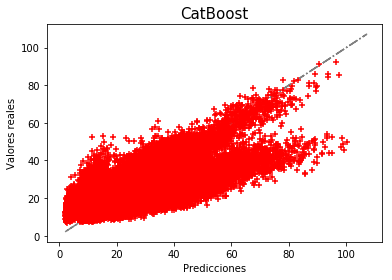

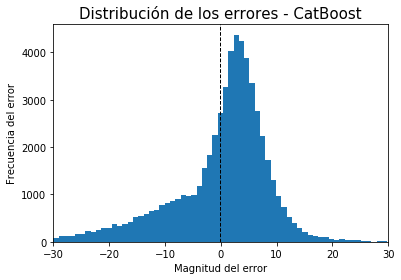

In [40]:
model_graph(y_test, cat_testing_predictions, 'CatBoost')

_____________________________________________

<a id="section_featimp"></a> 
### 6.5. Feature Importance

[Volver](#section_toc)

Tomamos de referencia el modelo de mejor performance en set de entrenamiento

,importances
cluster_1,12.542878
apparentTemperature,6.822347
hour_19,6.681510
summary_Clear,6.510804
hour_20,6.168933
temperature,5.970337
hour_18,5.442539
hour_21,4.747406
hour_4,4.097550
hour_3,3.908439


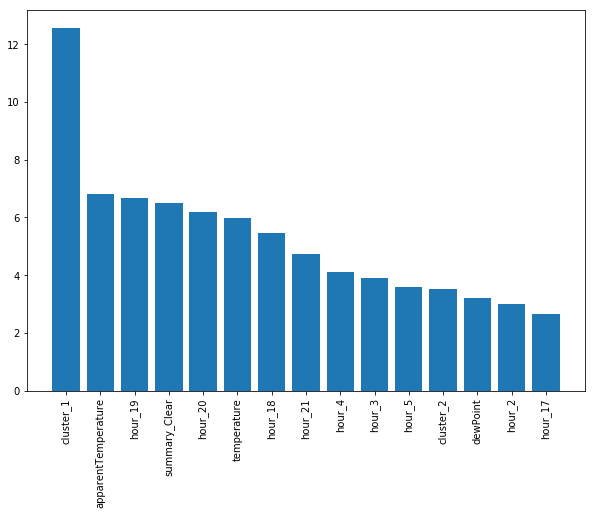

In [41]:
importancias = pd.DataFrame({'importances' : cat.feature_importances_})

feature_names = X_train.columns[importancias.index]
importancias.index = feature_names
importancias = importancias.sort_values(by = 'importances', ascending = False)

top_20_importances = importancias.iloc[0:15, :]
plt.figure(figsize = [10, 7])
plt.bar(height = top_20_importances['importances'], x = top_20_importances.index)
plt.xticks(rotation=90)
top_20_importances.head(20)

_____________________________________________

<a id="section_amp"></a> 

# <font color='skyblue'>7. Uso del modelo para predecir nuevos datos</font>

[Volver](#section_toc)

Vamos a evaluar nuestro modelo prediciendo valores de consumo para el caso de otros blocks. Ahora bien, no debemos perder de vista que <b>los distintos blocks presentan distintos patrones de consumo</b> (<b><u>ver notebook "Desafio_Final Clustering"</b></u>), por lo cual la capacidad predictiva de nuestro modelo entrenado en un único block puede perder eficacia, precisamente en función de esas diferencias.

<a id="section_random"></a> 
### 7.1. 'Block' al azar

[Volver](#section_toc)

In [42]:
## Seleccionamos aleatoriamente un block del total (semilla fijada en 198)

new_blocks = np.arange(0,111)
#blocks = np.delete(blocks, selected_block)

random_generator = np.random.default_rng(seed = 198)
new_block = random_generator.choice(new_blocks).astype('str')

In [43]:
new_block

'44'

In [44]:
## Importamos el .csv del block seleccionado

data_location = 'data/halfhourly_dataset/halfhourly_dataset/block_%s.csv' % (new_block)
block_data = pd.read_csv(data_location)

In [45]:
## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
block_data['date'] = block_data['full_datetime'].dt.date
block_data['year'] = block_data['full_datetime'].dt.year
block_data['month'] = block_data['full_datetime'].dt.month
block_data['week'] = block_data['full_datetime'].dt.week
block_data['day_name'] = block_data['full_datetime'].dt.day_name()
block_data['time'] = block_data['full_datetime'].dt.time
block_data['hour'] = block_data['full_datetime'].dt.hour

## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
block_data_hourly = block_data_hourly.reset_index()

## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

# Unimos el dataset con el listado de clusters de consumo

df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])

## Unimos el dataset resultante con el que contiene variables climáticas

df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
df_block_full['year'] = df_block_full['year'].astype('object')
df_block_full['month'] = df_block_full['month'].astype('object')
df_block_full['week'] = df_block_full['week'].astype('object')
df_block_full['hour'] = df_block_full['hour'].astype('object')

## Recortamos el análisis para el período posterior a 2012, cuando la cantidad de mediciones por cliente se estabilizó

year_mask = df_block_full['year'] >= 2013
df_block_full = df_block_full[year_mask]

In [46]:
## A partir del dataset mergeado con todos los datos, obtenemos el consumo total del bloque a partir de un groupby
## sin perder el resto de las variables incorporadas. Descartamos las variables propias de cliente al tratarse de
## una muestra 'homogénea'.

df_block_summary = df_block_full.groupby(['cluster','block', 'year', 'month', 'week', 'day_name', 'hour',
                                          'visibility','windBearing',
                                          'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                          'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
df_block_summary = df_block_summary.reset_index()
df_block_summary = df_block_summary.drop(columns = 'block')
df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

In [47]:
X_test_2 = df_block_summary.drop(columns = 'energy')
y_test_2 = df_block_summary['energy']

In [48]:
X_test_2_categorical = X_test_2[categorical]
X_test_2_categorical = pd.DataFrame(encoder.transform(X_test_2_categorical), columns = encoder.get_feature_names(categorical))

In [49]:
X_test_2_numerical = X_test_2[numerical]
X_test_2_numerical = pd.DataFrame(scaler.transform(X_test_2_numerical), columns = X_test_numerical.columns)

In [50]:
X_test_2 = pd.concat([X_test_2_categorical, X_test_2_numerical], axis = 1)
X_test_2.shape, X_test_2_categorical.shape, X_test_2_numerical.shape, y_test_2.shape

((10153, 116), (10153, 108), (10153, 8), (10153,))

In [51]:
cat_testing_predictions_2 = cat.predict(X_test_2)

In [52]:
model_evaluation(y_test_2, cat_testing_predictions_2)

MAE:  3.2001219506659155
MSE:  15.19534731008782
RMSE:  3.8981209973637068
R^2:  0.6780444347141046


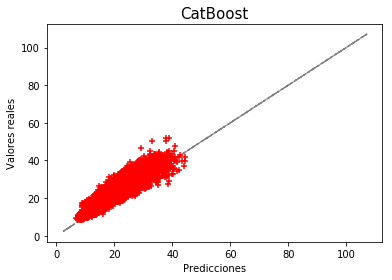

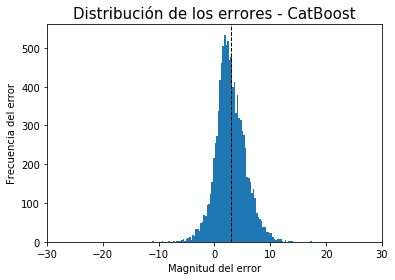

In [53]:
model_graph(y_test_2, cat_testing_predictions_2, 'CatBoost')

Observamos que el aplicar el modelo en un block de distinta naturaleza reduce en cierta forma la performance predictiva de nuestro modelo. El block seleccionado aleatoriamente pertenece al cluster 4 de consumo, mientras el block original pertenece al cluster 3, con un consumo levemente mayor y también una dispersión poco por encima.

<a id="section_same"></a> 
### 7.2. Evaluación del modelo sobre la totalidad de los datos

[Volver](#section_toc)

A continuación, tomaremos de referencia los distintos clusteres de consumo identificados, para evaluar si la performance se sostiene o el modelo está demasiado ajustado a los datos originales (overfitting).

Para ello importamos el listado de blocks por cluster.

In [54]:
cluster_data_location = 'block_clustering.csv'
block_clustering = pd.read_csv(cluster_data_location)

### Cluster 3

In [55]:
cluster_3_mask = block_clustering['cluster'] == 3
cluster_3 = block_clustering[cluster_3_mask]
list_cluster_3 = cluster_3['block'].values
list_cluster_3

array(['block_104', 'block_110', 'block_13', 'block_15', 'block_16',
       'block_17', 'block_18', 'block_19', 'block_20', 'block_22',
       'block_23', 'block_25', 'block_26', 'block_27', 'block_31',
       'block_33', 'block_35', 'block_36', 'block_37', 'block_38',
       'block_39', 'block_4', 'block_40', 'block_41', 'block_42',
       'block_48', 'block_49', 'block_51', 'block_54', 'block_57',
       'block_58', 'block_59', 'block_60', 'block_61', 'block_62',
       'block_63', 'block_65', 'block_67', 'block_69', 'block_70',
       'block_71', 'block_72', 'block_74', 'block_75', 'block_76',
       'block_77', 'block_79', 'block_80', 'block_81', 'block_82',
       'block_83', 'block_84', 'block_85', 'block_88', 'block_89'],
      dtype=object)

In [56]:
score_summary = []

for i in list_cluster_3:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    # Unimos el dataset con el listado de clusters de consumo

    df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
    df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['cluster','block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary = df_block_summary.drop(columns = 'block')
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 3})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_104 completa
Predicción del block_110 completa
Predicción del block_13 completa
Predicción del block_15 completa
Predicción del block_16 completa
Predicción del block_17 completa
Predicción del block_18 completa
Predicción del block_19 completa
Predicción del block_20 completa
Predicción del block_22 completa
Predicción del block_23 completa
Predicción del block_25 completa
Predicción del block_26 completa
Predicción del block_27 completa
Predicción del block_31 completa
Predicción del block_33 completa
Predicción del block_35 completa
Predicción del block_36 completa
Predicción del block_37 completa
Predicción del block_38 completa
Predicción del block_39 completa
Predicción del block_4 completa
Predicción del block_40 completa
Predicción del block_41 completa
Predicción del block_42 completa
Predicción del block_48 completa
Predicción del block_49 completa
Predicción del block_51 completa
Predicción del block_54 completa
Predicción del block_57 completa
Predicció

### Cluster 1

In [57]:
cluster_1_mask = block_clustering['cluster'] == 1
cluster_1 = block_clustering[cluster_1_mask]
list_cluster_1 = cluster_1['block'].values
list_cluster_1

array(['block_0', 'block_1', 'block_2'], dtype=object)

In [58]:
for i in list_cluster_1:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    # Unimos el dataset con el listado de clusters de consumo

    df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
    df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['cluster','block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary = df_block_summary.drop(columns = 'block')
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 1})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_0 completa
Predicción del block_1 completa
Predicción del block_2 completa
----------------------------------------
Todas las predicciones fueron realizadas


### Cluster 2

In [59]:
cluster_2_mask = block_clustering['cluster'] == 2
cluster_2 = block_clustering[cluster_2_mask]
list_cluster_2 = cluster_2['block'].values
list_cluster_2

array(['block_10', 'block_11', 'block_111', 'block_12', 'block_14',
       'block_24', 'block_28', 'block_29', 'block_3', 'block_30',
       'block_34', 'block_5', 'block_6', 'block_66', 'block_68',
       'block_7', 'block_73', 'block_8', 'block_9'], dtype=object)

In [60]:
for i in list_cluster_2:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    # Unimos el dataset con el listado de clusters de consumo

    df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
    df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['cluster','block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary = df_block_summary.drop(columns = 'block')
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 2})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_10 completa
Predicción del block_11 completa
Predicción del block_111 completa
Predicción del block_12 completa
Predicción del block_14 completa
Predicción del block_24 completa
Predicción del block_28 completa
Predicción del block_29 completa
Predicción del block_3 completa
Predicción del block_30 completa
Predicción del block_34 completa
Predicción del block_5 completa
Predicción del block_6 completa
Predicción del block_66 completa
Predicción del block_68 completa
Predicción del block_7 completa
Predicción del block_73 completa
Predicción del block_8 completa
Predicción del block_9 completa
----------------------------------------
Todas las predicciones fueron realizadas


### Cluster 4

In [61]:
cluster_4_mask = block_clustering['cluster'] == 4
cluster_4 = block_clustering[cluster_4_mask]
list_cluster_4 = cluster_4['block'].values
list_cluster_4

array(['block_100', 'block_101', 'block_102', 'block_103', 'block_105',
       'block_106', 'block_107', 'block_108', 'block_109', 'block_21',
       'block_32', 'block_43', 'block_44', 'block_45', 'block_46',
       'block_47', 'block_50', 'block_52', 'block_53', 'block_55',
       'block_56', 'block_64', 'block_78', 'block_86', 'block_87',
       'block_90', 'block_91', 'block_92', 'block_93', 'block_94',
       'block_95', 'block_96', 'block_97', 'block_98', 'block_99'],
      dtype=object)

In [62]:
for i in list_cluster_4:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    # Unimos el dataset con el listado de clusters de consumo

    df_block = df_block.merge(cluster_list, on = 'block', how = 'left')
    df_block = df_block.drop(columns = ['energy_std', 'energy_mean'])
    
    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')
    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['cluster','block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary = df_block_summary.drop(columns = 'block')
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary['cluster'] = df_block_summary['cluster'].astype('object')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 4})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_100 completa
Predicción del block_101 completa
Predicción del block_102 completa
Predicción del block_103 completa
Predicción del block_105 completa
Predicción del block_106 completa
Predicción del block_107 completa
Predicción del block_108 completa
Predicción del block_109 completa
Predicción del block_21 completa
Predicción del block_32 completa
Predicción del block_43 completa
Predicción del block_44 completa
Predicción del block_45 completa
Predicción del block_46 completa
Predicción del block_47 completa
Predicción del block_50 completa
Predicción del block_52 completa
Predicción del block_53 completa
Predicción del block_55 completa
Predicción del block_56 completa
Predicción del block_64 completa
Predicción del block_78 completa
Predicción del block_86 completa
Predicción del block_87 completa
Predicción del block_90 completa
Predicción del block_91 completa
Predicción del block_92 completa
Predicción del block_93 completa
Predicción del block_94 completa
P

## Performance del Modelo por Cluster de Consumo

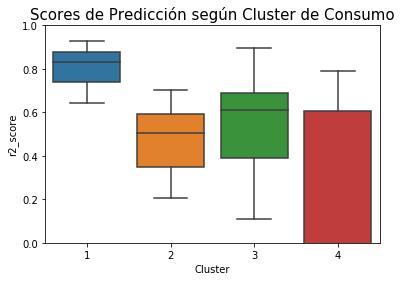

In [63]:
summary = pd.DataFrame(score_summary)

plt.figure()
g = sns.boxplot(x = summary['Cluster'], y = summary['r2_score'])
g.set_title('Scores de Predicción según Cluster de Consumo', fontsize = 15)
g.set_ylim([0,1])
plt.show()

A partir del gráfico podemos observar que la performance del modelo tiene un rendimiento positivo para blocks del mismo cluster, pero su rendimiento tiende a bajar para otros perfiles de consumo, en algunos casos de manera considerable (caso del Cluster 1, de mayor consumo).

In [64]:
cluster_count = summary.groupby('Cluster')['block'].count()
cluster_count = cluster_count.rename(index = 'block_count')
cluster_mean_r2 = summary.groupby('Cluster')['r2_score'].mean()
cluster_mean_r2 = cluster_mean_r2.rename(index = 'mean_r2')
cluster_median_r2 = summary.groupby('Cluster')['r2_score'].median()
cluster_median_r2 = cluster_median_r2.rename(index = 'median_r2')
cluster_mean_rmse = summary.groupby('Cluster')['rmse'].mean()
cluster_mean_rmse = cluster_mean_rmse.rename(index = 'mean_rmse')
cluster_median_rmse = summary.groupby('Cluster')['rmse'].median()
cluster_median_rmse = cluster_median_rmse.rename(index = 'median_rmse')
cluster_summary = pd.concat([cluster_count, cluster_mean_r2, cluster_median_r2, cluster_mean_rmse, cluster_median_rmse], axis = 1)
cluster_summary = cluster_summary.reset_index()
cluster_summary

,Cluster,block_count,mean_r2,median_r2,mean_rmse,median_rmse
0,1,3,0.800982,0.831996,6.128925,6.030866
1,2,19,-0.128521,0.506590,7.673386,7.534972
2,3,55,0.533657,0.612461,5.338333,5.155165
3,4,35,-0.762261,-0.250256,6.659389,6.426831


In [65]:
summary['r2_score'].mean()

0.02350917126510253

In [66]:
summary['r2_score'].median()

0.5094720902602652

In [67]:
summary['rmse'].median()

5.873571606748827

Con un resumen de los resultados, podemos ver que el modelo puede ser aplicable a ciertos blocks de otros clusters(ver valores máximos para cluster 1 y cluster 3), logrando un desempeño aceptable. Del análisis previo de Clusters se observa que estos tres agrupamientos no son tan disímiles entre sí, cómo si lo es el cluster 1.